# Bakery Sales Analysis

# Personal Project

# Author: Vi Le

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Import and Introduction

Data source: https://www.kaggle.com/datasets/matthieugimbert/french-bakery-daily-sales

In [3]:
## read data set
df = pd.read_csv("Bakery sales.csv")
df.head(10)

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
0,0,2021-01-02,08:38,150040.0,BAGUETTE,1.0,"0,90 €"
1,1,2021-01-02,08:38,150040.0,PAIN AU CHOCOLAT,3.0,"1,20 €"
2,4,2021-01-02,09:14,150041.0,PAIN AU CHOCOLAT,2.0,"1,20 €"
3,5,2021-01-02,09:14,150041.0,PAIN,1.0,"1,15 €"
4,8,2021-01-02,09:25,150042.0,TRADITIONAL BAGUETTE,5.0,"1,20 €"
5,11,2021-01-02,09:25,150043.0,BAGUETTE,2.0,"0,90 €"
6,12,2021-01-02,09:25,150043.0,CROISSANT,3.0,"1,10 €"
7,15,2021-01-02,09:27,150044.0,BANETTE,1.0,"1,05 €"
8,18,2021-01-02,09:32,150045.0,TRADITIONAL BAGUETTE,3.0,"1,20 €"
9,19,2021-01-02,09:32,150045.0,CROISSANT,6.0,"1,10 €"


In [4]:
df.tail()

,Unnamed: 0,date,time,ticket_number,article,Quantity,unit_price
234000,511387,2022-09-30,18:52,288911.0,COUPE,1.0,"0,15 €"
234001,511388,2022-09-30,18:52,288911.0,BOULE 200G,1.0,"1,20 €"
234002,511389,2022-09-30,18:52,288911.0,COUPE,2.0,"0,15 €"
234003,511392,2022-09-30,18:55,288912.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"
234004,511395,2022-09-30,18:56,288913.0,TRADITIONAL BAGUETTE,1.0,"1,30 €"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234005 entries, 0 to 234004
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     234005 non-null  int64  
 1   date           234005 non-null  object 
 2   time           234005 non-null  object 
 3   ticket_number  234005 non-null  float64
 4   article        234005 non-null  object 
 5   Quantity       234005 non-null  float64
 6   unit_price     234005 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 12.5+ MB


In [6]:
## check for missing (NaN) values
df.isna().sum()

Unnamed: 0       0
date             0
time             0
ticket_number    0
article          0
Quantity         0
unit_price       0
dtype: int64

## Data Exploration

### Show product quantity associates with date time values

In [10]:
## filter data set
sale = df[["date","time","Quantity"]]

## set [date] into index
sale = sale.set_index("date")

## turn index to datetime index
sale.index = pd.to_datetime(sale.index)

## extract day, year, month, and hour into their own columns on the same table using index
sale["Year"] = sale.index.year
sale["Month"] = sale.index.month
sale["Day"] = sale.index.day
sale["Hour"] = sale["time"].str[0:2].astype('int32')

## show random samples
sale.sample(20)

,time,Quantity,Year,Month,Day,Hour
date,,,,,,
2021-06-07,08:54,1.0,2021,6,7,8
2022-03-23,07:55,1.0,2022,3,23,7
2021-02-13,10:48,1.0,2021,2,13,10
2022-07-24,11:43,1.0,2022,7,24,11
2022-08-09,10:07,2.0,2022,8,9,10
2021-11-21,09:29,2.0,2021,11,21,9
2021-07-12,08:15,1.0,2021,7,12,8
2021-01-28,12:48,2.0,2021,1,28,12
2021-04-10,11:52,1.0,2021,4,10,11


### Turn into smaller group for visualization

In [11]:
## group by year
yearsale = sale[["Quantity", "Year"]].groupby("Year").sum()
yearsale = yearsale.reset_index()
yearsale

,Year,Quantity
0,2021,203319.0
1,2022,156669.0


Text(0.5, 1.0, 'Sales of 2021 and 2022')

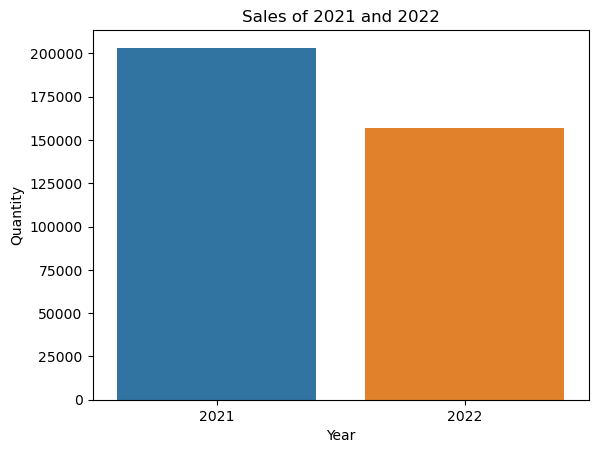

In [12]:
## visualize sale by year
yearsale_pl = sns.barplot(data=yearsale, x="Year", y="Quantity")
yearsale_pl.set_title("Sales of 2021 and 2022")

***Insights: Sale figures of 2021 is higher than sale figures of 2022.***

In [13]:
## group by month of each year
monthsale= sale[["Quantity", "Year", "Month"]]

## Sale each month in 2021
monthsale_21 = monthsale[monthsale["Year"]==2021].groupby(["Month","Year"]).sum("Quantity")
monthsale_21 = monthsale_21.reset_index()

## Sale each month in 2022
monthsale_22 = monthsale[monthsale["Year"]==2022].groupby(["Month","Year"]).sum("Quantity")
monthsale_22 = monthsale_22.reset_index()

monthsale_com = pd.merge(monthsale_21, monthsale_22, on="Month", how="outer")
monthsale_com

,Month,Year_x,Quantity_x,Year_y,Quantity_y
0,1,2021,9476.0,2022.0,8952.0
1,2,2021,11834.0,2022.0,11531.0
2,3,2021,13794.0,2022.0,11789.0
3,4,2021,16554.0,2022.0,14925.0
4,5,2021,19469.0,2022.0,17643.0
5,6,2021,16369.0,2022.0,15659.0
6,7,2021,28337.0,2022.0,29192.0
7,8,2021,33328.0,2022.0,33545.0
8,9,2021,15276.0,2022.0,13433.0
9,10,2021,14971.0,NaN,NaN


Text(0.5, 1.0, 'Monthly Sale')

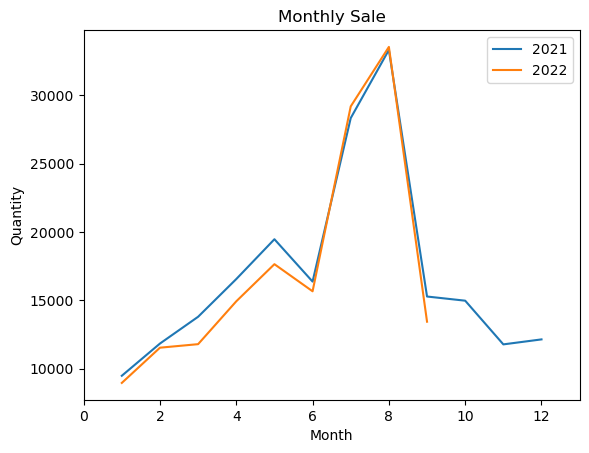

In [14]:
## concat them into line plot
month21 = sns.lineplot(data=monthsale_21, x="Month", y="Quantity", label="2021");
month21.set_xlim(0,13) 
month22 = sns.lineplot(data=monthsale_22, x="Month", y="Quantity", label="2022")
month22.set_xlim(0,13)
month22.set_title("Monthly Sale")


***Insights: As presented in the plot, so far, the highest month sales in both year is August, the second highest month sales is May.***

In [15]:
## group by each day of August 2021
daysale21 = sale.loc[(sale["Year"]==2021) & (sale["Month"]==8)]
daysale21 = daysale21[["Quantity", "Day"]].groupby("Day").sum()

daysale22 = sale.loc[(sale["Year"]==2022) & (sale["Month"]==8)]
daysale22 = daysale22[["Quantity", "Day"]].groupby("Day").sum()

daysale_com = pd.merge(daysale21, daysale22, on="Day")
daysale_com

,Quantity_x,Quantity_y
Day,,
1,1330.0,1152.0
2,1048.0,997.0
3,1166.0,949.0
4,909.0,999.0
5,1003.0,1030.0
6,949.0,1236.0
7,1187.0,1571.0
8,1490.0,1458.0
9,1218.0,1094.0


[(0.0, 31.0),

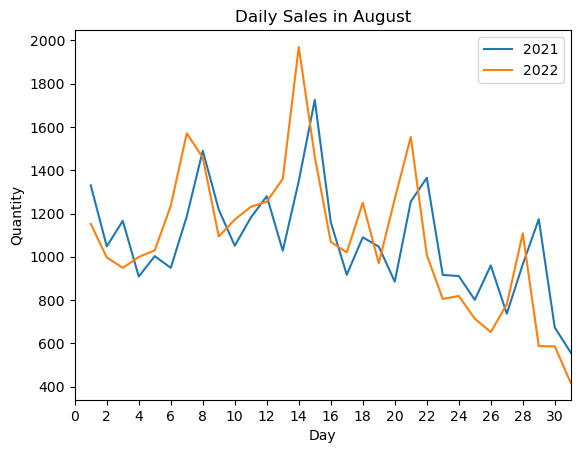

In [16]:
daysale_21 = sns.lineplot(data=daysale21, x="Day", y="Quantity", label="2021")
daysale_22 = sns.lineplot(data=daysale22, x="Day", y="Quantity", label="2022")
daysale_21.set_title("Daily Sales in August")
daysale_21.set(xlim=(0,31), xticks=np.arange(0,31,2))

***Insights: Daily sales in August of both year is pretty similar to each other. There are 4 peaks, which seems to happened every 7 days (1 week). The highest daily sale of 2021 is on the 15th, of 2022 is on the 14th***

***This could be because those peaks are weekends day (either Saturday or Sunday).***

In [32]:
## group by time in a day, of 15th day in August,2021, and of 14th day in August,2022
timesale_15 = sale.loc[(sale["Year"]==2021) & (sale["Month"]==8) & (sale["Day"]==15)]
timesale_15 = timesale_15[["Quantity", "Hour"]].groupby("Hour").sum()

timesale_14 = sale.loc[(sale["Year"]==2022) & (sale["Month"]==8) & (sale["Day"]==14)]
timesale_14 = timesale_14[["Quantity", "Hour"]].groupby("Hour").sum()

timesale_10 = sale.loc[(sale["Year"]==2021) & (sale["Month"]==8) & (sale["Day"]==10)]
timesale_10 = timesale_10[["Quantity", "Hour"]].groupby("Hour").sum()

timesale_5 = sale.loc[(sale["Year"]==2022) & (sale["Month"]==8) & (sale["Day"]==5)]
timesale_5 = timesale_5[["Quantity", "Hour"]].groupby("Hour").sum()

Text(0.5, 1.0, 'Hourly Sale')

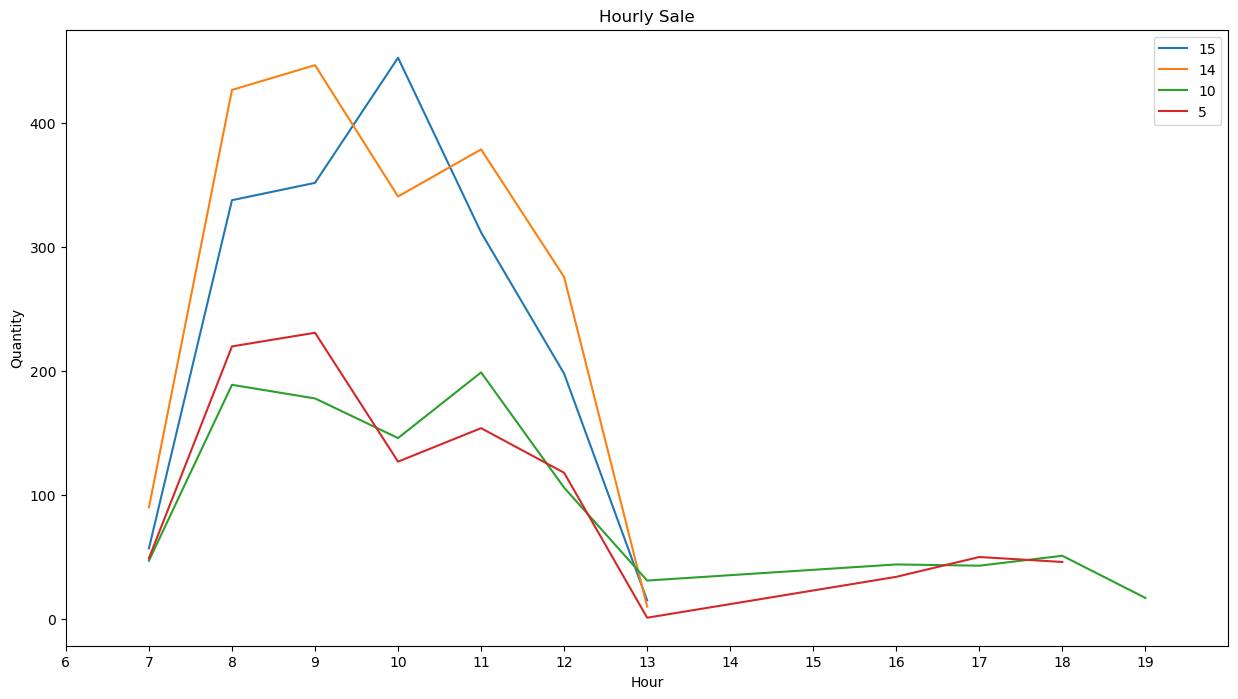

In [37]:
## visualize the data
plt.figure(figsize=(15,8))
timesale_15pl = sns.lineplot(data=timesale_15, x="Hour", y="Quantity", label="15")
timesale_14pl = sns.lineplot(data=timesale_14, x="Hour", y="Quantity", label="14")
timesale_10pl = sns.lineplot(data=timesale_10, x="Hour", y="Quantity", label="10")
timesale_5pl = sns.lineplot(data=timesale_5, x="Hour", y="Quantity", label="5")
timesale_14pl.set(xlim=(6,20), xticks=np.arange(6,20,1))
timesale_14pl.set_title("Hourly Sale")

***Insights:***
- It is more clear that the busiest day (15 and 14 as shown previously) are weekend days, since the hours recorded stopped at 13 (1pm), indicated that they closed early.
- Through some plot from other days, it seems that the bakery got busy during morning hours, and peak seemed to started an hour after opening.

### Show popularity of products

In [59]:
## filter data set
product = df[["article", "Quantity"]].groupby("article").sum().sort_values("Quantity", ascending=False)
product = product.reset_index()
product_top6 = product.head(6)

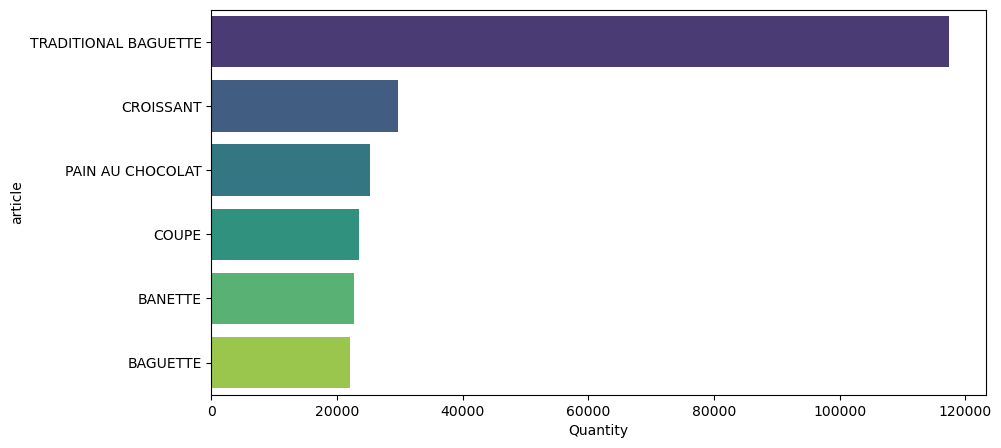

In [65]:
## visualize top 6 best selling products
plt.figure(figsize=(10,5))
product_pl = sns.barplot(data=product_top6, x="Quantity", y="article", orient='h', palette= "viridis")

***Insights: Of all the products sold by the bakery, Traditional Baguette is the best selling, the runner up is croissant***

### Bottom line:
**Based on these results, the owner can prepare for peak time of the day, and busy day of the week. The owner could also have a better views on product sale in order to improve the inventory.**